In [1]:
# fetch_mldata is DEPRECATED. Updated method if Colab updates sklearn
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# print(X.shape)
# print(y.shape)

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

logisticRegr.predict(test_img[0:10])
predictions = logisticRegr.predict(test_img)

score = logisticRegr.score(test_img, test_lbl)
print(score)

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)   


0.9134


In [5]:
print('MNIST has {} images and each image is in a 28x28={} field'.format(mnist.data.shape[0], mnist.data.shape[1]))
print('Logistic Regression fails on {} images'.format(len(misclassifiedIndexes)))
# plt.hist(mnist.target, bins=np.arange(mnist.target.min(), mnist.target.max()+1), density=True, facecolor='g', alpha=0.75)
# import seaborn as sns
# sns.distplot(mnist.target, kde=False)

MNIST has 70000 images and each image is in a 28x28=784 field
Logistic Regression fails on 866 images


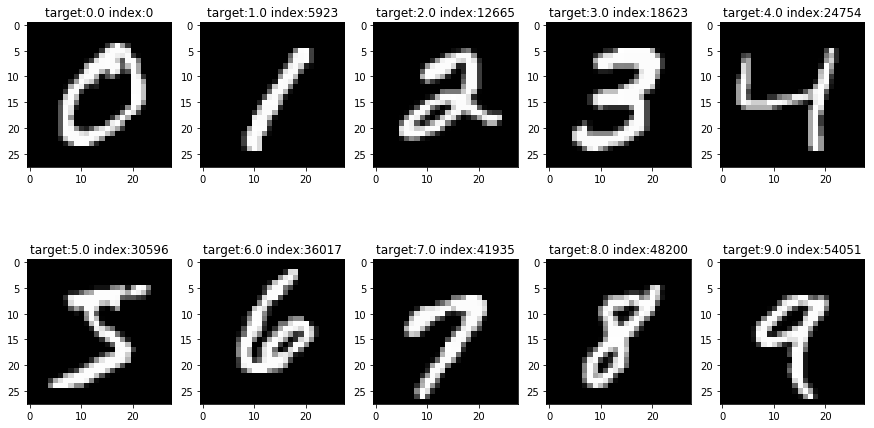

In [4]:
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    for idx, val in enumerate(mnist.target):
        if val == i:
            plt.imshow(np.reshape(mnist.data[idx], (28,28)), cmap=plt.cm.gray)
            plt.title('target:{} index:{}'.format(mnist.target[idx], idx))
            break